In [89]:
import pandas as pd

In [90]:
df= pd.read_csv('/content/DFORE153D1.csv')

In [91]:
df.dropna(inplace=True)

In [92]:
df.head()

,machine_id,machine_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength
0,102-FNZ,Washer,3,10,1064390,1042283,1064400,2021-08-13 20:12:39.0000000,2021-06-11 17:31:53.5400000,63
1,060-FRY,Washer,33,62,1025639,139032,1025701,2021-08-08 16:55:01.0000000,2021-06-05 02:23:48.7420000,64
2,419-GHT,Washer,6,27,811738,23446,811765,2021-08-10 21:21:33.8810000,2021-07-23 20:17:39.0000000,18
3,836-FPX,Washer,69,221,308640,30660,308861,2021-08-13 20:11:40.0000000,2019-02-14 10:14:31.0000000,911
4,697-GMB,Washer,1,6774,282047,54283,288821,2021-04-02 00:41:08.0000000,2021-03-16 21:29:14.4750000,17


In [93]:
df['Txn2CorrRatio']= df['TotTxn'].divide(df['TotCorr'])

In [94]:
df['TopOffProportion']= df.TopOffs.divide(df['BaseCycles']+df.TopOffs)

In [95]:
df['TxnDailyAvg']= df.TotTxn.divide(df.TimeLength+1)

In [96]:
df['cash2AllTxnRatio']= (df.TotTxn-df.NonCashTotTxn)/df.TotTxn

In [97]:
features= ['Txn2CorrRatio', 'TopOffProportion', 'TxnDailyAvg','cash2AllTxnRatio']
# features= ['Txn2CorrRatio', 'TopOffProportion', 'TxnDailyAvg']

In [98]:
df1=df.groupby('machine_type')[features].describe(percentiles=[.05, .25, .5, .75, .95, .96, .97, .98, .99, .999]).stack(level=0).loc[:,['5%', '25%', '50%', '75%', '95%', '96%', '97%', '98%', '99%', '99.9%']]

In [99]:
df1

5%       25%  ...        99%        99.9%
machine_type                                       ...                        
Dryer        TopOffProportion  0.000000  0.030303  ...   1.000000     1.000000
             Txn2CorrRatio     1.000000  1.000000  ...   2.896225     6.523036
             TxnDailyAvg       0.208818  0.666667  ...  12.951193   455.116700
             cash2AllTxnRatio  0.000000  0.500000  ...   1.000000     1.000000
Washer       TopOffProportion  0.000000  0.000000  ...   1.000000     1.000000
             Txn2CorrRatio     1.000000  1.000000  ...   4.500000    23.259205
             TxnDailyAvg       0.163934  0.561404  ...   8.990000  1017.570757
             cash2AllTxnRatio  0.000000  0.426154  ...   1.000000     1.000000

[8 rows x 10 columns]

In [100]:
# {'Dryer': {'TopOffProportion': }, 'Washer': {}}

In [101]:
for f in features:
  df[f+'_flg']= 0
  for m in ['Dryer', 'Washer']:
    v= df1.loc[m, '97%'].loc[f]
    df.loc[df[f] > v, f+'_flg']=1

In [102]:
# df['AllFlgs']= df['Txn2CorrRatio_flg']+df['TopOffProportion_flg']+df['TxnDailyAvg_flg']+ df['cash2AllTxnRatio_flg']
df['AllFlgs']= df['Txn2CorrRatio_flg']+df['TopOffProportion_flg']+df['TxnDailyAvg_flg']

In [103]:
df.AllFlgs.value_counts()

0    25078
1     1868
2      368
3       61
Name: AllFlgs, dtype: int64

In [104]:
df['Dryer']=pd.get_dummies(df.machine_type).loc[:,'Dryer']

In [105]:
df2= df.loc[:,['machine_id', 'Txn2CorrRatio', 'TopOffProportion', 'TxnDailyAvg', 'cash2AllTxnRatio', 'Dryer']]

In [106]:
# df.dropna(inplace=True)

In [107]:
# df2.loc[:, ['Txn2CorrRatio', 'TopOffProportion', 'TxnDailyAvg', 'cash2AllTxnRatio', 'Dryer']].values

In [108]:
# df2.set_index('machine_id', inplace=True)

In [56]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [87]:
# metrics_df.columns
#specify the 12 metrics column names to be modelled
# to_model_columns=metrics_df.columns[1:13]
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
def ISolationForestHarness(df, features= features, defects=0.01):
  df= df.fillna(df.median(), inplace=True)
  scaler = MinMaxScaler()
  df2= pd.DataFrame(scaler.fit_transform(df.loc[:, features].values), columns= features, index=df.index)
  # clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(defects), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
  # clf.fit(df3)
  # pred = clf.predict(df2)
  # df['IsoForest']=pred
  # # df2['IsoForest']=pred
  # outliers=df.loc[df['IsoForest']==-1]
  # outlier_index=list(outliers.index)
  # # print(df2.loc[outlier_index, 'machine_id'])
  # # #Find the number of anomalies and normal points here points classified -1 are anomalous
  # print(df['IsoForest'].value_counts())
  return(df)

In [88]:
df= ISolationForestHarness(df)

AttributeError: ignored

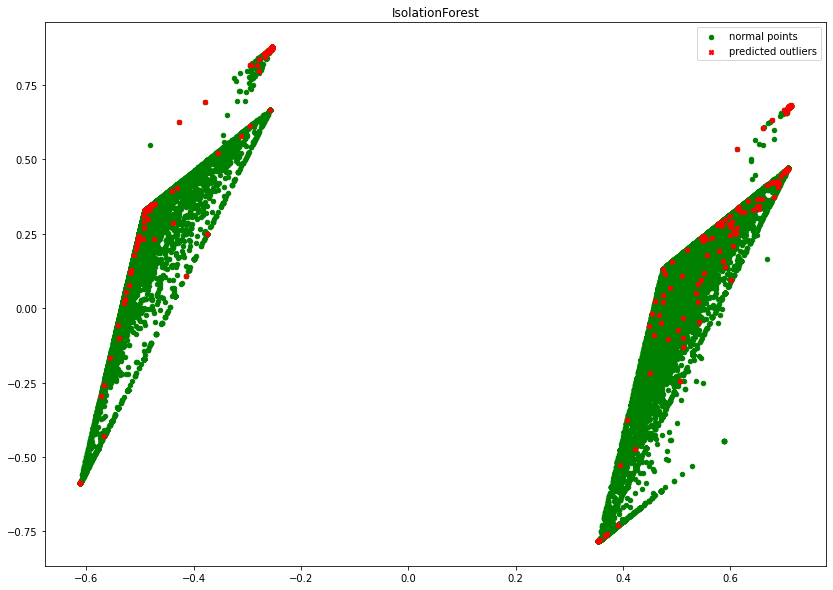

In [ ]:
from sklearn.decomposition import PCA
plt.figure(figsize=(14,10))
pca = PCA(2)
pca.fit(df3)
res=pd.DataFrame(pca.transform(df3))
Z = np.array(res)
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green', s=20,label="normal points")
b1 = plt.scatter(res.loc[outlier_index,0],res.loc[outlier_index,1], c='red',s=20,  edgecolor="red",label="predicted outliers", marker='X')
plt.legend(loc="upper right")
plt.show()

In [ ]:
df2

,machine_id,Txn2CorrRatio,TopOffProportion,TxnDailyAvg,cash2AllTxnRatio,Dryer,IsoForest
0,102-FNZ,1.021220,0.999991,16631.250000,0.999997,0,-1
1,060-FRY,7.377445,0.999940,15780.015385,0.999968,0,-1
2,419-GHT,34.622750,0.999967,42724.473684,0.999993,0,-1
3,836-FPX,10.073744,0.999284,338.663377,0.999777,0,-1
4,697-GMB,5.320653,0.976546,16045.611111,0.999997,0,-1
...,...,...,...,...,...,...,...
39130,413-GXK,1.000000,0.000000,1.000000,0.000000,0,1
39135,371-BZH,1.000000,0.000000,1.000000,0.000000,0,1
39141,MZQ-428,1.000000,1.000000,1.000000,1.000000,1,1
39147,392-GXK,1.000000,0.000000,1.000000,1.000000,0,1


In [ ]:
df2.loc[:, 'TopOffprop005']=1
df2.loc[df2.nlargest(137, 'TopOffProportion').index, 'TopOffprop005']= -1

In [ ]:
df2.loc[:,'c2r005']=1
df2.loc[df2.nlargest(137, 'cash2AllTxnRatio').index, 'c2r005']= -1

In [ ]:
#'TxnDailyAvg
df2.loc[:,'txnAvg005']=1
df2.loc[df2.nlargest(137, 'TxnDailyAvg').index, 'txnAvg005']= -1

In [ ]:
df2

,machine_id,Txn2CorrRatio,TopOffProportion,TxnDailyAvg,cash2AllTxnRatio,Dryer,IsoForest,TopOffprop005,c2r005,txnAvg005
0,102-FNZ,1.021220,0.999991,16631.250000,0.999997,0,-1,1,1,-1
1,060-FRY,7.377445,0.999940,15780.015385,0.999968,0,-1,1,1,-1
2,419-GHT,34.622750,0.999967,42724.473684,0.999993,0,-1,1,1,-1
3,836-FPX,10.073744,0.999284,338.663377,0.999777,0,-1,1,1,-1
4,697-GMB,5.320653,0.976546,16045.611111,0.999997,0,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...
39130,413-GXK,1.000000,0.000000,1.000000,0.000000,0,1,1,1,1
39135,371-BZH,1.000000,0.000000,1.000000,0.000000,0,1,1,1,1
39141,MZQ-428,1.000000,1.000000,1.000000,1.000000,1,1,1,1,1
39147,392-GXK,1.000000,0.000000,1.000000,1.000000,0,1,1,1,1


In [ ]:
df4= pd.read_csv('/content/DFORE153D2.csv')

In [ ]:
df4['BrightAI']=-1

In [ ]:
df4.loc[df4.Reason.str.lower().str.contains('ok').fillna(False),'BrightAI']= 1

In [ ]:
df4.BrightAI.value_counts()

-1    187
 1     34
Name: BrightAI, dtype: int64

In [ ]:
df4.sort_values(['licensePlate', 'BrightAI'], ascending= True, inplace=True)

In [ ]:
df4.drop_duplicates(keep= 'first', inplace= True)

In [ ]:
df5=df2.merge(df4.loc[df4.BrightAI== -1, ['licensePlate','BrightAI']], how='left',left_on= 'machine_id', right_on='licensePlate').fillna(1)

In [ ]:
#df5.IsoForest df5.TopOffprop005
#c2r005	txnAvg005	licensePlate	Status

In [ ]:
df5.columns

Index(['machine_id', 'Txn2CorrRatio', 'TopOffProportion', 'TxnDailyAvg',
       'cash2AllTxnRatio', 'Dryer', 'IsoForest', 'TopOffprop005', 'c2r005',
       'txnAvg005', 'licensePlate', 'BrightAI'],
      dtype='object')

In [ ]:
mapV= {-1:1, 1:0}

In [ ]:
df5.columns

Index(['machine_id', 'Txn2CorrRatio', 'TopOffProportion', 'TxnDailyAvg',
       'cash2AllTxnRatio', 'Dryer', 'IsoForest', 'TopOffprop005', 'c2r005',
       'txnAvg005', 'licensePlate', 'BrightAI'],
      dtype='object')

In [ ]:
df6=df5.replace({'IsoForest': mapV, 'TopOffprop005': mapV, 'c2r005': mapV,
       'txnAvg005': mapV, 'BrightAI': mapV})

In [ ]:
df6['Allflag']= df6.loc[:, ['IsoForest', 'TopOffprop005', 'c2r005', 'txnAvg005', 'BrightAI']].sum(axis=1)

In [ ]:
df6['Vendflag']= df6.loc[:, ['IsoForest', 'TopOffprop005', 'c2r005', 'txnAvg005']].sum(axis=1)

In [ ]:
df6.Allflag.value_counts(normalize=True)

0.0    0.977632
1.0    0.016849
2.0    0.003545
3.0    0.001498
4.0    0.000402
5.0    0.000073
Name: Allflag, dtype: float64

In [ ]:
pd.crosstab(df6.BrightAI, df6.Vendflag)

Vendflag,0,1,2,3,4
BrightAI,,,,,
0.0,26749,345,90,24,6
1.0,116,7,17,5,2


In [ ]:
df6['AnyVendFlag']= 0
df6.loc[df6.Vendflag > 0, 'AnyVendFlag']=1

In [ ]:
pd.crosstab(df6.BrightAI, df6.AnyVendFlag)

AnyVendFlag,0,1
BrightAI,,
0.0,26749,465
1.0,116,31


In [ ]:
df6.columns

Index(['machine_id', 'Txn2CorrRatio', 'TopOffProportion', 'TxnDailyAvg',
       'cash2AllTxnRatio', 'Dryer', 'IsoForest', 'TopOffprop005', 'c2r005',
       'txnAvg005', 'licensePlate', 'BrightAI', 'Allflag', 'Vendflag',
       'AnyVendFlag'],
      dtype='object')

In [ ]:
df6.loc[(df6.AnyVendFlag==1) & (df6.BrightAI== 0), ['machine_id', 'IsoForest', 'TopOffprop005', 'c2r005', 'txnAvg005']].to_csv('LikelyRogues08182021.csv')

In [ ]:
df6.cash2AllTxnRatio.loc[df6.c2r005==1].min()

1.0

In [ ]:
df6.head()

,machine_id,Txn2CorrRatio,TopOffProportion,TxnDailyAvg,cash2AllTxnRatio,Dryer,IsoForest,TopOffprop005,c2r005,txnAvg005,licensePlate,BrightAI,Allflag,Vendflag,AnyVendFlag
0,102-FNZ,1.021220,0.999991,16631.250000,0.999997,0,1,0,0,1,1,0.0,2.0,2,1
1,060-FRY,7.377445,0.999940,15780.015385,0.999968,0,1,0,0,1,1,0.0,2.0,2,1
2,419-GHT,34.622750,0.999967,42724.473684,0.999993,0,1,0,0,1,419-GHT,1.0,3.0,2,1
3,836-FPX,10.073744,0.999284,338.663377,0.999777,0,1,0,0,1,1,0.0,2.0,2,1
4,697-GMB,5.320653,0.976546,16045.611111,0.999997,0,1,0,0,1,697-GMB,1.0,3.0,2,1


In [ ]:
df6[['machine_id', 'IsoForest',	'TopOffprop005',	'c2r005',	'Allflag', 'txnAvg005', 'Vendflag', 'BrightAI']]

,machine_id,IsoForest,TopOffprop005,c2r005,Allflag,txnAvg005,Vendflag,BrightAI
0,102-FNZ,1,0,0,2.0,1,2,0.0
1,060-FRY,1,0,0,2.0,1,2,0.0
2,419-GHT,1,0,0,3.0,1,2,1.0
3,836-FPX,1,0,0,2.0,1,2,0.0
4,697-GMB,1,0,0,3.0,1,2,1.0
...,...,...,...,...,...,...,...,...
27356,413-GXK,0,0,0,0.0,0,0,0.0
27357,371-BZH,0,0,0,0.0,0,0,0.0
27358,MZQ-428,0,0,0,0.0,0,0,0.0
27359,392-GXK,0,0,0,0.0,0,0,0.0
